<!-- Table of Contents generated by Jupytoc -->
**Table of Contents**
- [Classifying on shots features using Random Forest](#Classifying-on-shots-features-using-Random-Forest)
  - [Load data](#Load-data)
  - [Append other global features](#Append-other-global-features)
  - [Classifying](#Classifying)
  - [Precision score](#Precision-score)
  - [Confusion matrix](#Confusion-matrix)


In [9]:
%matplotlib inline

# Classifying on shots features using Random Forest

In [10]:
import numpy as np
import pandas as pd

## Load data

In [11]:
df_shots = pd.read_csv('../features/shots/shots_metadata.csv')
#df.set_index('filename', inplace=True)
df_shots.head()

,filename,has_text,nb_faces_max,nb_shots
0,Aabbey1-InvitationToSummer2009RabbinicalStudyS...,True,0,1
1,Aabbey1-RachelSabathBeitHalachmiThreeModelsOfT...,True,1,2
2,Aabbey1-ShalomHartmanInstitutesInnovativeTheol...,True,1,5
3,Acnethai-414,False,1,2
4,Acnethai-EP4HowToMakeUpForAcneFromBobbiBrown565,True,0,7


## Append other global features

In [13]:
df_metadata = pd.read_csv('../features/metadata/attributes.csv')
df = df_shots.merge(df_metadata, on='filename')
df.set_index('filename', inplace=True)
features = ['has_text', 'nb_faces_max', 'nb_shots', 'duration', 'size', 'uploader_id']
df = df[features]
df.head()

,has_text,nb_faces_max,nb_shots,duration,size,uploader_id
filename,,,,,,
Aabbey1-InvitationToSummer2009RabbinicalStudySeminarAtHartmanIn262,True,0,1,100,6330756,196106
Aabbey1-RachelSabathBeitHalachmiThreeModelsOfTorahOnCelebrating136,True,1,2,402,30294842,196106
Aabbey1-ShalomHartmanInstitutesInnovativeTheologyConference661,True,1,5,212,13742982,196106
Acnethai-414,False,1,2,584,32123974,343571
Acnethai-EP4HowToMakeUpForAcneFromBobbiBrown565,True,0,7,429,38037812,343571


## Classifying

The `RandomForestClassifier` must be a good choice to classify videos into tags. In fact, here we have some interesting features like the number of shots per video, the max number of faces founded into keyframes, and a boolean measure related to existence of text.

In [21]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Add real tags to dataframe
df['tag'] = pd.read_csv('../features/tags.csv', index_col=0)['tag_name']

y = df['tag']
X = df.drop('tag', axis=1)

# Compute Cross-Validation
scores = model_selection.cross_val_score(
    clf,
    X=X.values,
    y=y,
    scoring='accuracy',
    cv=5
)

# Fit classifier
clf.fit(X_train, y_train)
# Predict for X_test
y_pred = clf.predict(X_test)

## Precision score


In [22]:
from sklearn import metrics

precision = metrics.precision_score(y_test, y_pred, average='micro')
print('Précision :', precision)

Précision : 0.721739130435


## Confusion matrix

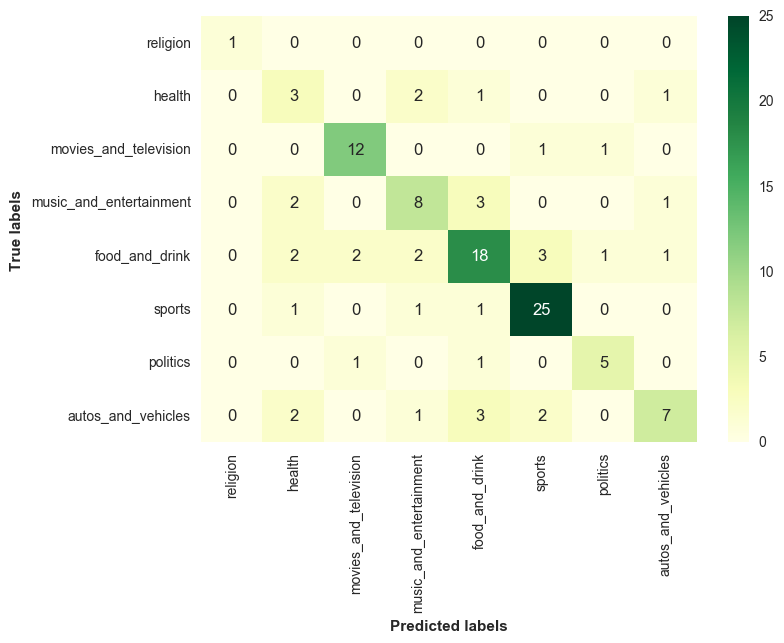

In [18]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=y.unique(), yticklabels=y.unique(), cmap='YlGn')
ax.set_xlabel('Predicted labels', fontweight='bold')
ax.set_ylabel('True labels', fontweight='bold')